# 3. Data Analysis

## 3.1 Introduction

## 3.2 Data Overview

### 3.2.1 Importing Libraries

In [1]:
# Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import plotly.express as px
import geopandas as gpd
import statsmodels.stats.proportion as prop
import statsmodels.api as sm
import scipy.stats as stats
from libpysal.weights import KNN
import libpysal as lps
from esda.moran import Moran
from pykrige.ok import OrdinaryKriging
from dotenv import load_dotenv
import os
import sys

# Load the environment variables
load_dotenv("../config/.env")

# Get the path to the scripts folder
scripts_path = os.getenv("SCRIPTS_PATH")

# Add the path to the scripts folder to the sys.path list
if scripts_path is not None:
    if scripts_path not in sys.path:
        sys.path.append(scripts_path)

# Import the custom functions from the scripts folder
from trend_label import *
from map_labels_legend import *

# Set the style of the plots
plt.style.use('ggplot')

# Display all the columns
pd.set_option('display.max_columns', None)

# Stop scientific notation and limit to 2 decimal points
pd.set_option('display.float_format', '{:.2f}'.format)

### 3.2.2 Loading Data

In [2]:
# Load the `migraine_weather` DataFrame from 02_data_preprocessing.ipynb
migraine_weather = pd.read_csv("../data/processed/migraine_weather_data.csv")

# Check the shape of the DataFrame
print(migraine_weather.shape)

# Check the first 5 rows of the DataFrame
migraine_weather.head()

(23489, 26)


,sex,age,cause,year,total_cases,total_cases_upper_ci,total_cases_lower_ci,avg_temp_f,min_temp_f,max_temp_f,country,state,snow_depth_in,avg_sea_level_pres_mmhg,avg_wind_speed_mph,precipitation_in,avg_wind_dir_deg,sum_abs_pressure_changes,std_pressure_changes,count_significant_pressure_changes,latitude,longitude,population,area,region,continent
0,Male,85+ years,Migraine,2015,6721,8764,5091,71.60,68.00,77.00,Taiwan,Non-US,17.52,761.31,7.46,17.87,286,0.00,0.00,0,25.04,121.56,23424615,36193,Eastern Asia,Asia
1,Female,45-49 years,Tension-type headache,2015,189293,293944,120618,71.60,68.00,77.00,Taiwan,Non-US,17.52,761.31,7.46,17.87,286,0.00,0.00,0,25.04,121.56,23424615,36193,Eastern Asia,Asia
2,Female,50-54 years,Tension-type headache,2015,194310,282166,122451,71.60,68.00,77.00,Taiwan,Non-US,17.52,761.31,7.46,17.87,286,0.00,0.00,0,25.04,121.56,23424615,36193,Eastern Asia,Asia
3,Female,55-59 years,Tension-type headache,2015,157713,229677,101843,71.60,68.00,77.00,Taiwan,Non-US,17.52,761.31,7.46,17.87,286,0.00,0.00,0,25.04,121.56,23424615,36193,Eastern Asia,Asia
4,Female,15-19 years,Tension-type headache,2015,160246,247914,97203,71.60,68.00,77.00,Taiwan,Non-US,17.52,761.31,7.46,17.87,286,0.00,0.00,0,25.04,121.56,23424615,36193,Eastern Asia,Asia


### 3.2.3 Data Description

#### 3.2.3.1 Data Types

In [3]:
migraine_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23489 entries, 0 to 23488
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   sex                                 23489 non-null  object 
 1   age                                 23489 non-null  object 
 2   cause                               23489 non-null  object 
 3   year                                23489 non-null  int64  
 4   total_cases                         23489 non-null  int64  
 5   total_cases_upper_ci                23489 non-null  int64  
 6   total_cases_lower_ci                23489 non-null  int64  
 7   avg_temp_f                          23489 non-null  float64
 8   min_temp_f                          23489 non-null  float64
 9   max_temp_f                          23489 non-null  float64
 10  country                             23489 non-null  object 
 11  state                               23489

#### 3.2.3.2 Summary Statistics

In [4]:
migraine_weather.describe()

,year,total_cases,total_cases_upper_ci,total_cases_lower_ci,avg_temp_f,min_temp_f,max_temp_f,snow_depth_in,avg_sea_level_pres_mmhg,avg_wind_speed_mph,precipitation_in,avg_wind_dir_deg,sum_abs_pressure_changes,std_pressure_changes,count_significant_pressure_changes,latitude,longitude,population,area
count,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00
mean,2006.62,209451.20,275324.09,154462.27,60.40,52.36,69.25,2.47,760.87,7.79,46.06,264.82,2082.37,4.89,117.46,33.02,-22.49,126999967.42,3461275.18
std,9.09,670217.82,863663.58,507660.24,13.49,13.96,13.73,5.05,2.41,2.57,76.59,68.31,3255.25,2.55,191.62,20.67,75.81,190691864.55,4412179.29
min,1990.00,0.00,0.00,0.00,17.60,15.80,19.40,0.00,747.81,0.00,0.00,0.00,0.00,0.00,0.00,-34.86,-171.77,11323.00,2.00
25%,1999.00,6672.00,8675.00,4870.00,50.00,42.80,59.00,0.04,759.06,6.21,7.99,268.00,307.40,3.28,5.00,21.31,-84.40,5469700.00,41850.00
50%,2007.00,44803.00,59364.00,32776.00,59.00,50.00,68.00,0.51,761.31,7.46,25.20,284.00,1195.70,5.31,63.00,39.05,-8.54,30492800.00,450295.00
75%,2015.00,154337.00,203204.00,111740.00,71.60,62.60,82.40,2.76,762.81,9.32,52.20,290.00,1820.10,6.58,114.00,44.65,15.05,319259000.00,9629091.00
max,2019.00,16870296.00,21695928.00,12654858.00,95.00,84.20,109.40,33.03,771.06,18.64,891.85,359.00,31098.60,20.89,1753.00,69.64,179.22,1367110000.00,9984670.00


## 3.3 Data Cleaning and Preprocessing

### 3.3.1 Missing Values

In [5]:
migraine_weather.isnull().sum()

sex                                   0
age                                   0
cause                                 0
year                                  0
total_cases                           0
total_cases_upper_ci                  0
total_cases_lower_ci                  0
avg_temp_f                            0
min_temp_f                            0
max_temp_f                            0
country                               0
state                                 0
snow_depth_in                         0
avg_sea_level_pres_mmhg               0
avg_wind_speed_mph                    0
precipitation_in                      0
avg_wind_dir_deg                      0
sum_abs_pressure_changes              0
std_pressure_changes                  0
count_significant_pressure_changes    0
latitude                              0
longitude                             0
population                            0
area                                  0
region                                0


### 3.3.2 Data Type Conversion

Converting the data types of the following columns from `object` to `category`: `sex`, `age`, `cause`, `country`, `state`, `region`, and `continent`.

This change is beneficial for several reasons:
    - **Memory Efficiency**: Category data types use significantly less memory, especially when the number of unique categories is small compared to the dataset size.
    - **Performance**: Operations on category data types, such as grouping and sorting, are typically faster than their `object` string counterparts.
    - **Semantics**: Converting to `category` reflects the nature of the data more accurately, as these columns represent categorical variables.

In [6]:
# Define the columns to convert to categorical data types
cols_to_convert = ['sex', 'age', 'cause', 'country', 'state', 'region', 'continent']

# Convert the columns to categorical data types
migraine_weather[cols_to_convert] = migraine_weather[cols_to_convert].astype('category')

# Check the data types of the DataFrame
migraine_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23489 entries, 0 to 23488
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   sex                                 23489 non-null  category
 1   age                                 23489 non-null  category
 2   cause                               23489 non-null  category
 3   year                                23489 non-null  int64   
 4   total_cases                         23489 non-null  int64   
 5   total_cases_upper_ci                23489 non-null  int64   
 6   total_cases_lower_ci                23489 non-null  int64   
 7   avg_temp_f                          23489 non-null  float64 
 8   min_temp_f                          23489 non-null  float64 
 9   max_temp_f                          23489 non-null  float64 
 10  country                             23489 non-null  category
 11  state                       

Converting the data types of the following columns from 'float64' to 'int64': `min_temp_f`, `max_temp_f`, `avg_temp_f`, `precipitation_in`, `snow_depth_in`, `avg_sea_level_pres_mmhg`, `avg_wind_speed_mph`, and `avg_wind_dir_deg`.

The rationale behind this includes:

- **Data Accuracy**: These columns represent counts or whole numbers and should be stored as integers to reflect the discrete nature of the data.
- **Data Integrity**: Converting to `int64` ensures that these variables are treated as discrete data points, which can prevent potential issues with floating-point precision that are not relevant for integer-based data.
- **Memory Usage**: Depending on the data, integers can sometimes use less memory than floats, although this is less of a concern with 64-bit types.

In [7]:
# List of columns to convert to integer data types
cols_to_convert = ['min_temp_f', 'max_temp_f', 'avg_temp_f', 'precipitation_in', 'snow_depth_in', 'avg_sea_level_pres_mmhg', 'avg_wind_speed_mph', 'avg_wind_dir_deg']

# Convert the columns to integer data types
migraine_weather[cols_to_convert] = migraine_weather[cols_to_convert].astype('int64')

# Check the data types of the DataFrame
migraine_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23489 entries, 0 to 23488
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   sex                                 23489 non-null  category
 1   age                                 23489 non-null  category
 2   cause                               23489 non-null  category
 3   year                                23489 non-null  int64   
 4   total_cases                         23489 non-null  int64   
 5   total_cases_upper_ci                23489 non-null  int64   
 6   total_cases_lower_ci                23489 non-null  int64   
 7   avg_temp_f                          23489 non-null  int64   
 8   min_temp_f                          23489 non-null  int64   
 9   max_temp_f                          23489 non-null  int64   
 10  country                             23489 non-null  category
 11  state                       

## 3.4 Exploratory Data Analysis

- Visualize the distribution of migraines and sea-level pressure.
- Explore the relationship between migraines and different regions (if geographic data is available).
- Look for trends over time (seasonality, year-on-year changes, etc.).
- Investigate the relationship between migraines and other weather variables, if available.

### 3.4.1 Univariate Analysis

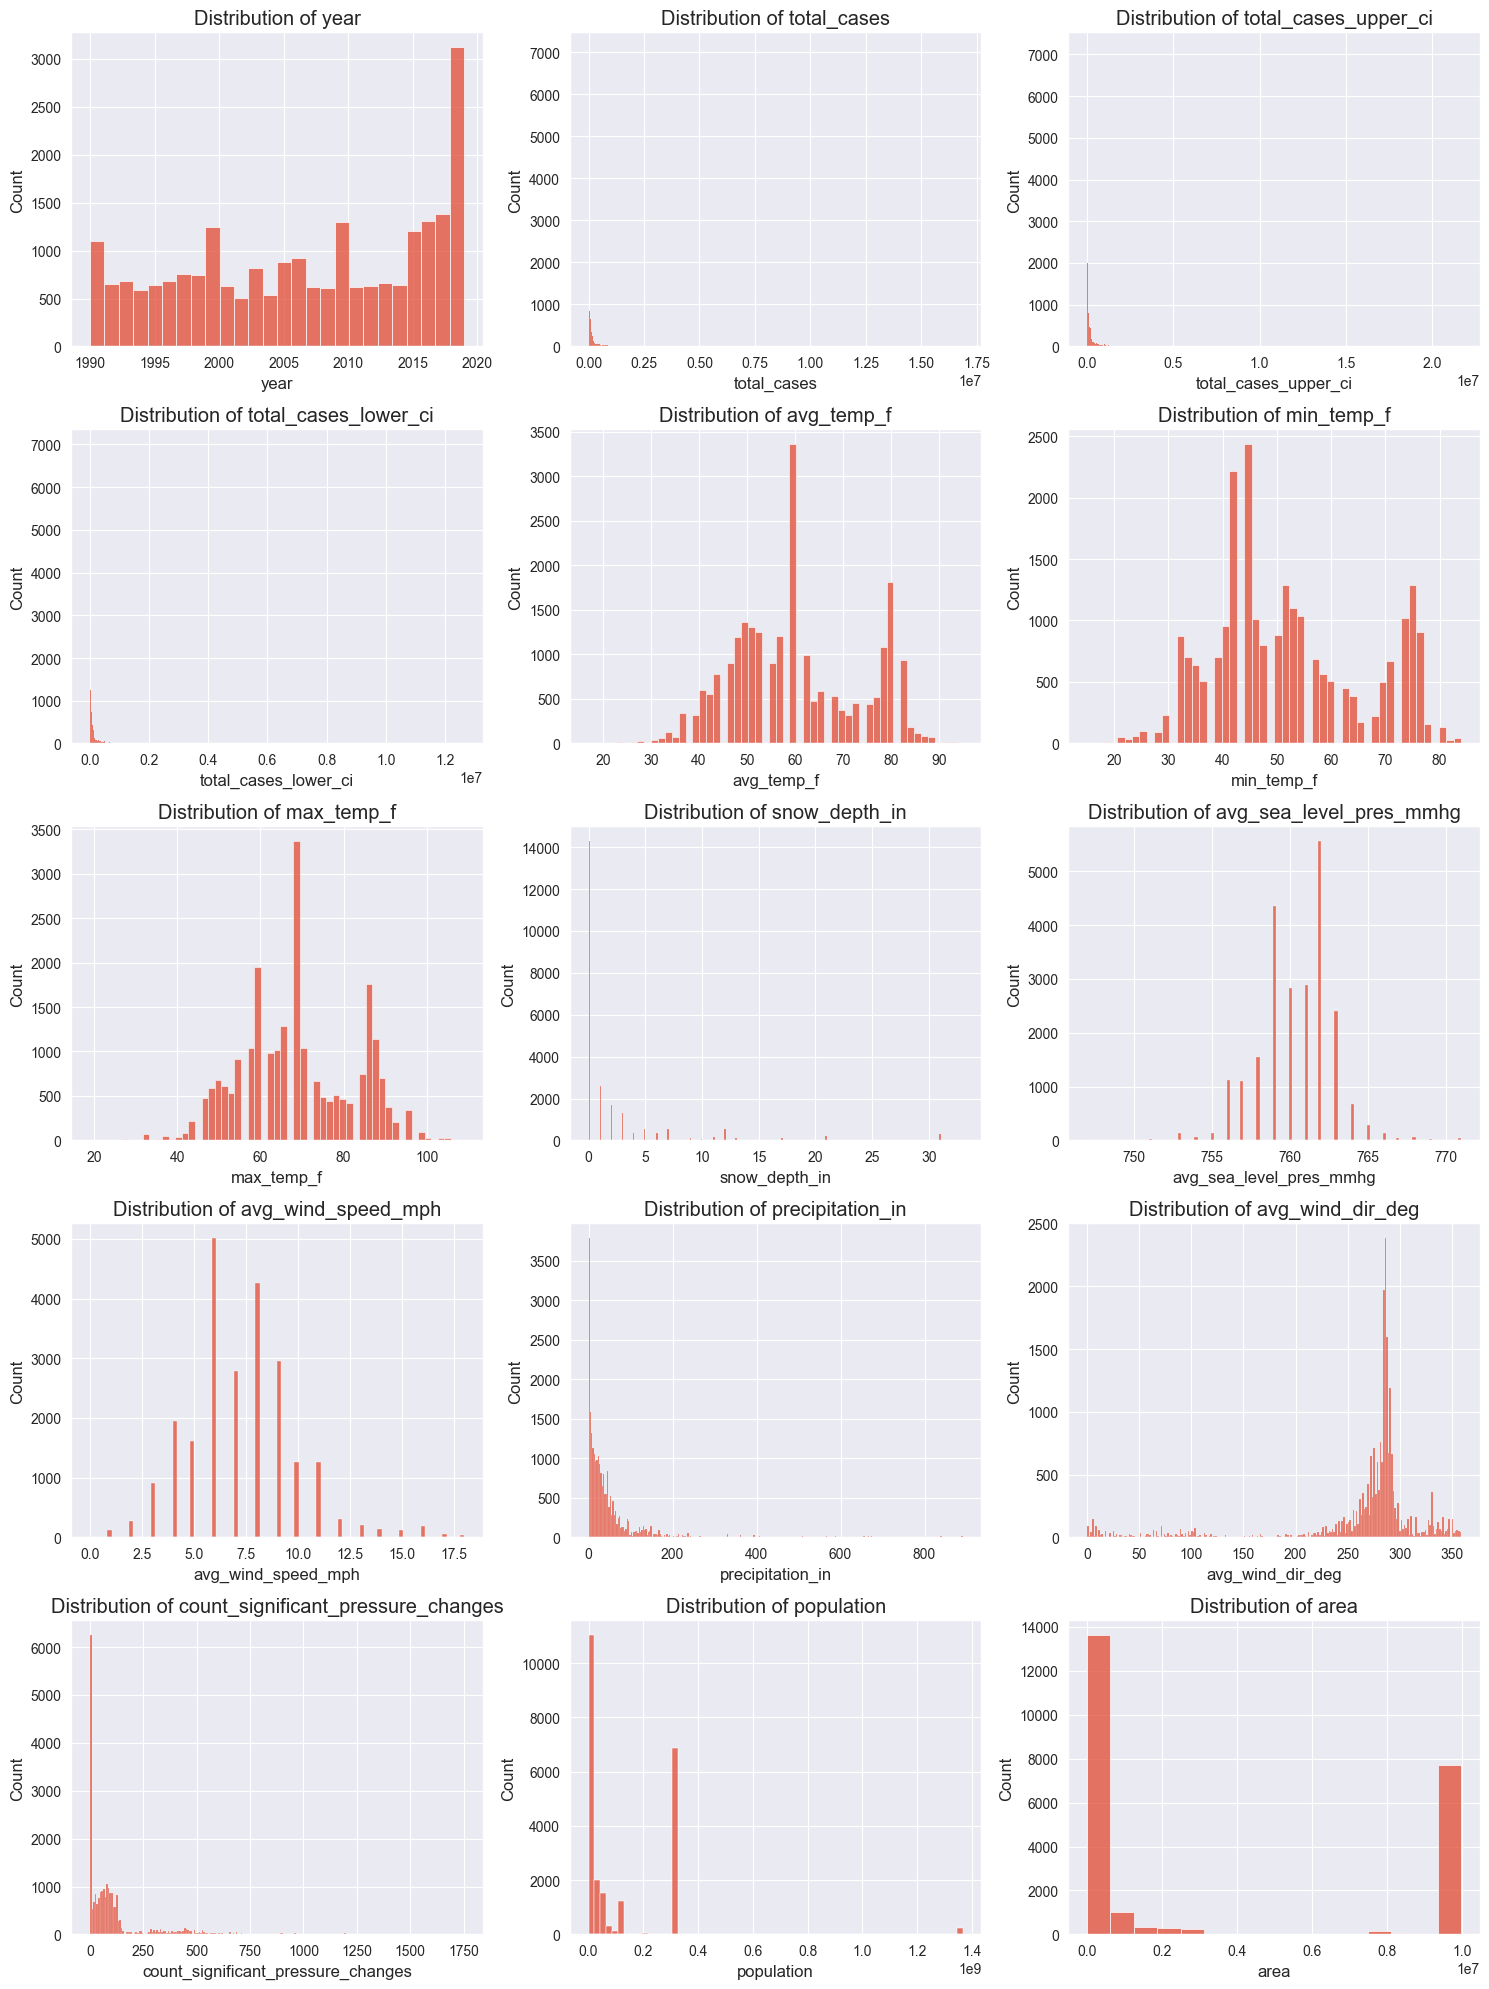

In [8]:
# Set the aesthetic style of the plots
sns.set_style("darkgrid")

# Create a grid of histograms for numeric columns
numeric_columns = migraine_weather.select_dtypes(include='int64').columns
num_plots = len(numeric_columns)
cols_per_row = 3  # You can change this to however many columns you want per row

# Calculate the number of rows needed
num_rows = (num_plots + cols_per_row - 1) // cols_per_row

# Create a figure with specified dimensions
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, num_rows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the numeric columns and create a histogram on each subplot
for i, col in enumerate(numeric_columns):
    sns.histplot(migraine_weather[col], kde=False, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Hide any empty subplots that aren't used
for j in range(i + 1, num_rows * cols_per_row):
    fig.delaxes(axes[j])

# Adjust the layout
plt.tight_layout()
plt.show()

## 3.5 Statistical Analysis

- Conduct correlation analysis between sea-level pressure and migraine occurrences.
- Perform hypothesis testing to determine if the observed correlation is statistically significant.
- Explore regression analysis if appropriate, considering other variables that may affect migraines.

### 3.5.1 Correlation Analysis: Sea Level Pressure vs. Migraine Occurrences

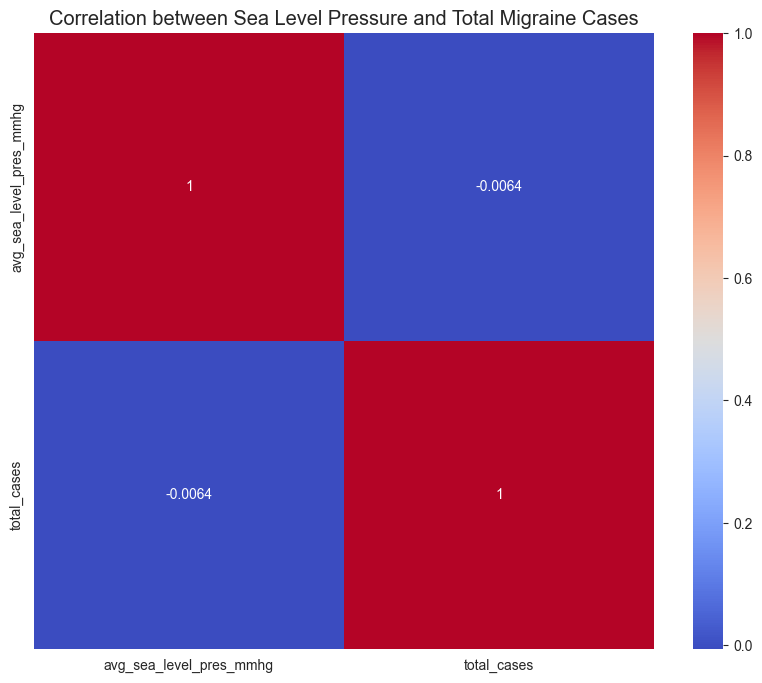

,avg_sea_level_pres_mmhg,total_cases
avg_sea_level_pres_mmhg,1.00,-0.01
total_cases,-0.01,1.00


In [9]:
# Create correlation heatmap for sea level pressure and total migraine cases
plt.figure(figsize=(10, 8))
sns.heatmap(migraine_weather[['avg_sea_level_pres_mmhg', 'total_cases']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Sea Level Pressure and Total Migraine Cases')
plt.show()

migraine_weather[['avg_sea_level_pres_mmhg', 'total_cases']].corr()

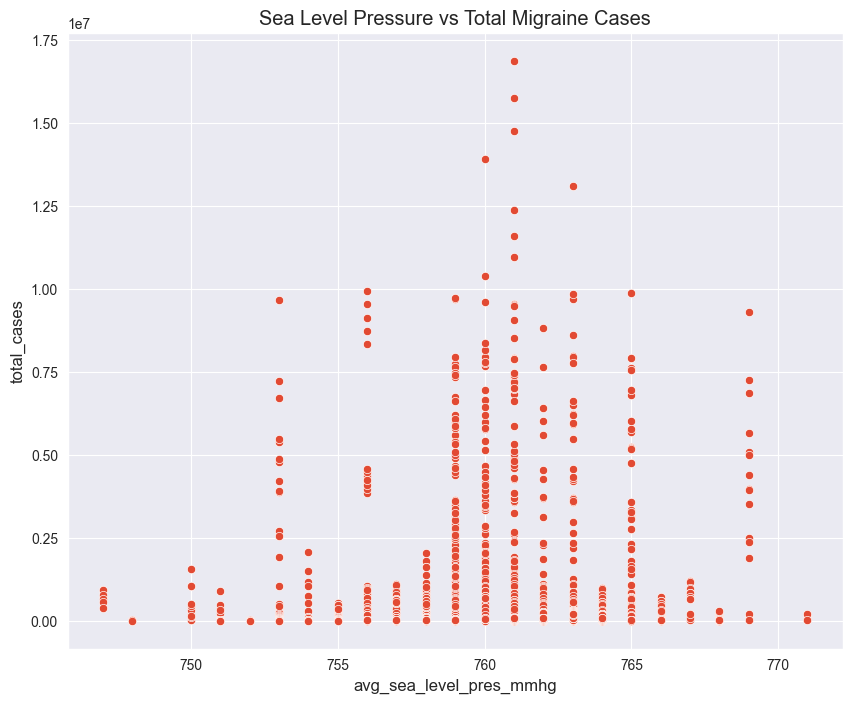

In [10]:
# Create a scatter plot of sea level pressure and total migraine cases
plt.figure(figsize=(10, 8))
sns.scatterplot(data=migraine_weather, x='avg_sea_level_pres_mmhg', y='total_cases')
plt.title('Sea Level Pressure vs Total Migraine Cases')
plt.show()

### 3.5.2 Hypothesis Testing: Sea Level Pressure vs. Migraine Occurrences

#### 3.5.2.1 Is there a statistically significant correlation between sea-level pressure and migraine occurrences?

Hypothesis: There is a statistically significant correlation between sea-level pressure and migraine occurrences.

- *Null Hypothesis*: There is no statistically significant correlation between sea-level pressure and migraine occurrences.
- *Alternative Hypothesis*: There is a statistically significant correlation between sea-level pressure and migraine occurrences.

In [11]:
# Set the display options to show more decimal places
pd.set_option('display.float_format', '{:.6f}'.format)

# Calculate the Pearson correlation coefficient and the p-value
correlation_coefficient, p_value = stats.pearsonr(migraine_weather['avg_sea_level_pres_mmhg'], migraine_weather['total_cases'])

# Print the results
print(f"Correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Correlation coefficient: -0.006392230128586297
P-value: 0.32726443228891766


As shown in the correlation analysis, there is not a statistically significant correlation between sea-level pressure and migraine occurrences. Therefore, we fail to reject the null hypothesis. This means that we cannot conclude that there is a statistically significant correlation between sea-level pressure and migraine occurrences.

#### 3.5.2.2 Is there a statistically significant difference in migraine occurrences between high and low sea-level pressure days?

Hypothesis: The mean number of migraines on high sea-level pressure days is different from the mean number of migraines on low sea-level pressure days.

- *Null Hypothesis*: The mean number of migraines on high sea-level pressure days is equal to the mean number of migraines on low sea-level pressure days.
- *Alternative Hypothesis*: The mean number of migraines on high sea-level pressure days is not equal to the mean number of migraines on low sea-level pressure days.

In [12]:
# Define threshold for high and low sea level pressure
threshold = migraine_weather['avg_sea_level_pres_mmhg'].max()

# Define high and low sea level pressure
high_slp = migraine_weather[migraine_weather['avg_sea_level_pres_mmhg'] >= threshold]['total_cases']
low_slp = migraine_weather[migraine_weather['avg_sea_level_pres_mmhg'] < threshold]['total_cases']

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(high_slp, low_slp, equal_var=False)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -14.182378223137304
P-value: 4.834352440277886e-23


As shown in the hypothesis testing, there is not a statistically significant difference in migraine occurrences between high and low sea-level pressure days. Therefore, we fail to reject the null hypothesis. This means that we cannot conclude that there is a statistically significant difference in migraine occurrences between high and low sea-level pressure days.

#### 3.5.2.3 Is there a weather variable that is more strongly correlated with migraine occurrences than sea-level pressure?

Hypothesis: There is a weather variable that is more strongly correlated with migraine occurrences than sea-level pressure.

- *Null Hypothesis*: There is no weather variable that is more strongly correlated with migraine occurrences than sea-level pressure.
- *Alternative Hypothesis*: There is a weather variable that is more strongly correlated with migraine occurrences than sea-level pressure.

In [20]:
# Identify columns that seem to be weather-related
weather_columns = [col for col in migraine_weather.columns if 'temp' in col or 'pres' in col 
                   or 'pressure' in col or 'wind' in col or 'precip' in col or 'snow' in col]

# Calculate the Pearson correlation coefficient for each weather-related variable with total_cases
correlation_results = {}
for column in weather_columns:
    # We will calculate correlation and p-value
    correlation, p_value = stats.pearsonr(migraine_weather[column], migraine_weather['total_cases'])
    correlation_results[column] = (correlation, p_value)

# Output the results
correlation_results_sorted = sorted(correlation_results.items(), key=lambda item: abs(item[1][0]), reverse=True)

# Convert the sorted correlation results into a pandas DataFrame for better visualization
correlation_results_df = pd.DataFrame(correlation_results_sorted, columns=['Weather Variable', 'Correlation and P-value'])

# Split the tuple into separate columns for better readability
correlation_results_df[['Correlation Coefficient', 'P-value']] = pd.DataFrame(\
    correlation_results_df['Correlation and P-value'].tolist(), index=correlation_results_df.index)
correlation_results_df.drop(columns='Correlation and P-value', inplace=True)

# Display the DataFrame
correlation_results_df

,Weather Variable,Correlation Coefficient,P-value
0,precipitation_in,0.314188,0.000000
1,avg_wind_speed_mph,-0.150179,0.000000
2,sum_abs_pressure_changes,0.144364,0.000000
3,count_significant_pressure_changes,0.090771,0.000000
4,min_temp_f,0.029381,0.000007
5,avg_temp_f,0.025066,0.000122
6,max_temp_f,0.021759,0.000853
7,snow_depth_in,-0.008555,0.189832
8,avg_wind_dir_deg,-0.006934,0.287921
9,avg_sea_level_pres_mmhg,-0.006392,0.327264


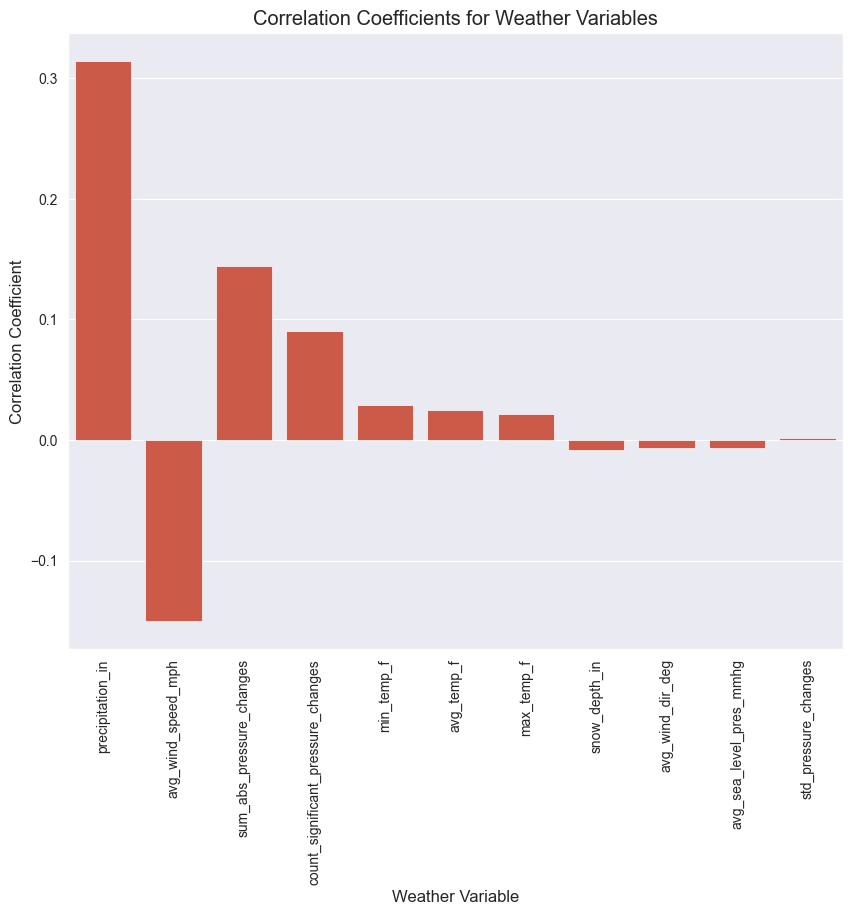

In [21]:
# Set Weather Variable as the index
correlation_results_df.set_index('Weather Variable', inplace=True)

# Create a bar plot of the correlation coefficients
plt.figure(figsize=(10, 8))
sns.barplot(data=correlation_results_df, x='Weather Variable', y='Correlation Coefficient')
plt.xticks(rotation=90)
plt.title('Correlation Coefficients for Weather Variables')
plt.show()

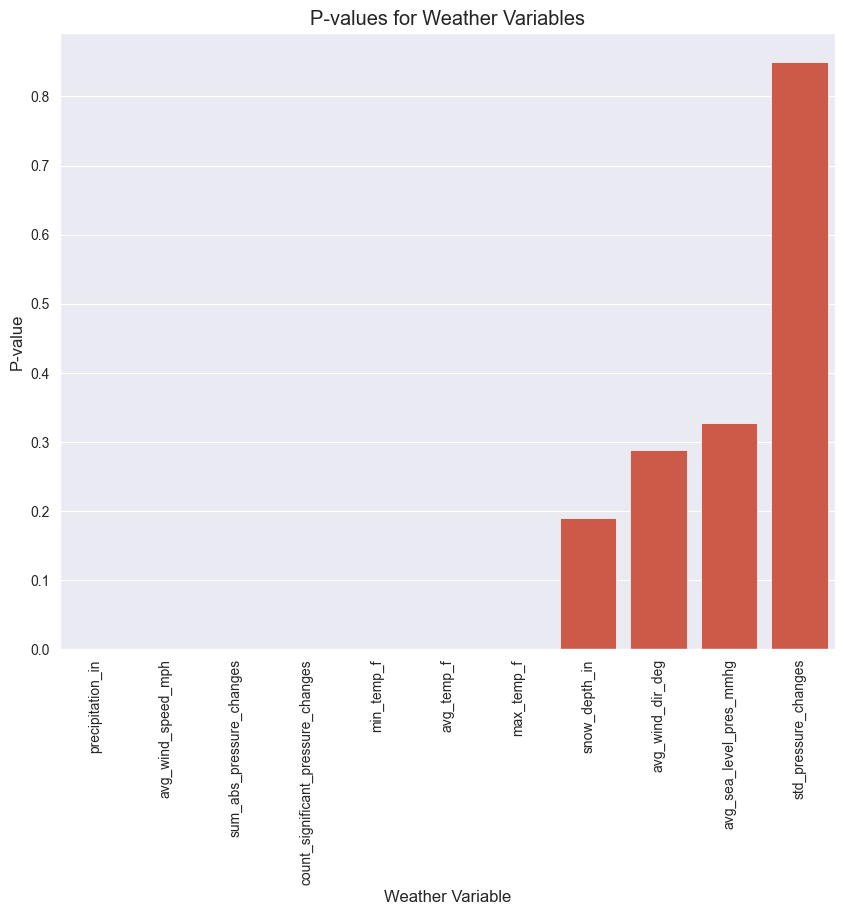

In [23]:
# Create a bar plot of the p-values
plt.figure(figsize=(10, 8))
sns.barplot(data=correlation_results_df, x='Weather Variable', y='P-value')
plt.xticks(rotation=90)
plt.title('P-values for Weather Variables')
plt.show()

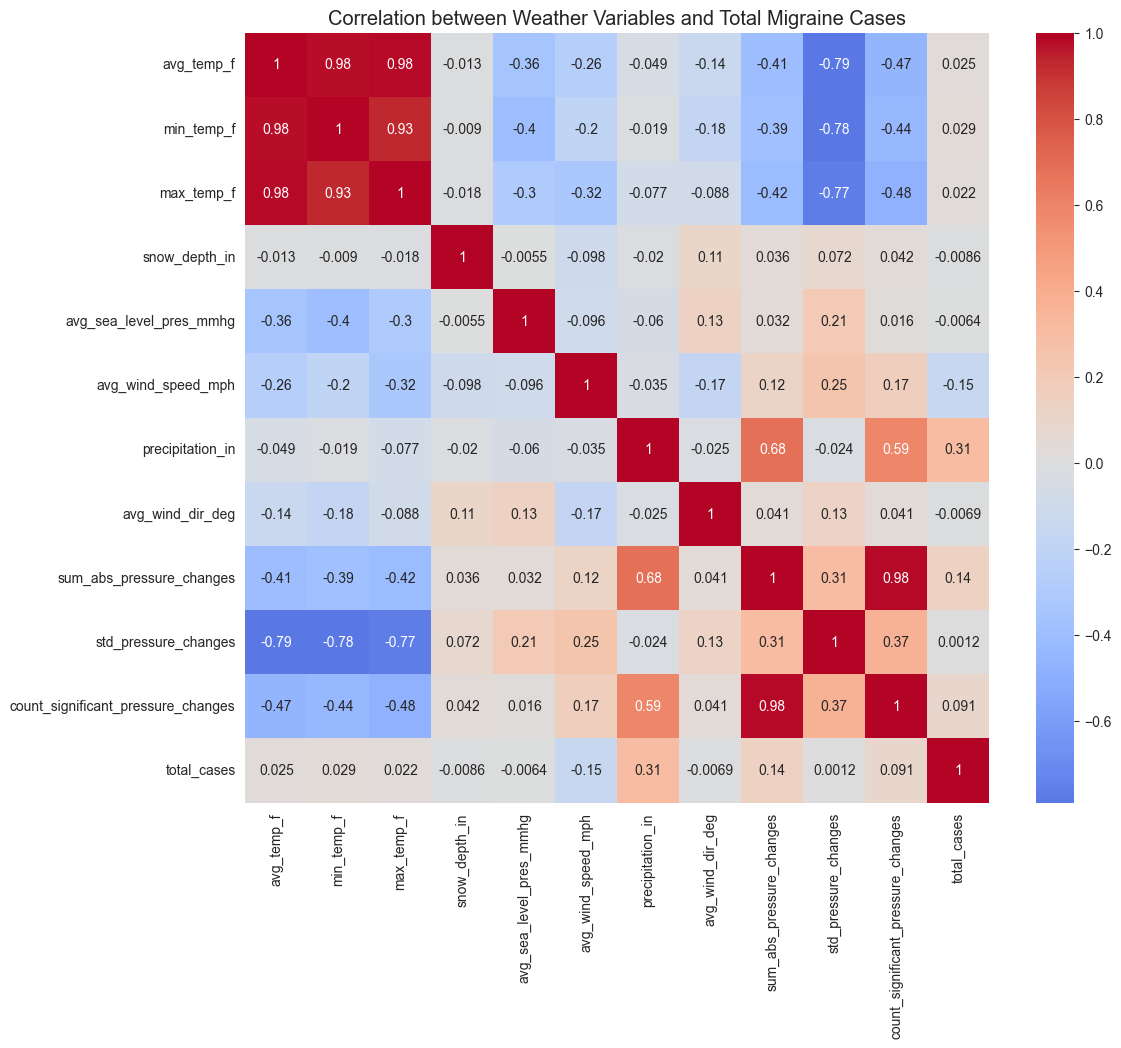

In [27]:

# Create a correlation matrix datafraeme of the weather-related variables and total_cases
weather_corr = migraine_weather[weather_columns + ['total_cases']].corr()

# Create a heatmap of numerical columns
plt.figure(figsize=(12, 10))
sns.heatmap(weather_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Weather Variables and Total Migraine Cases')
plt.show()

Based on these results, the alternative hypothesis — that there is a weather variable more strongly correlated with migraine occurrences than sea-level pressure — is supported and the null hypothesis is rejected. Specifically, **precipitation** has a notably stronger positive correlation with migraine occurrences compared to sea-level pressure, which has an insignificant and negligible correlation.

- **Precipitation (`precipitation_in`)**: The strongest correlation with migraine occurrences is with `precipitation_in` (precipitation in inches), with a correlation coefficient of `0.314142`, which is positive and statistically significant with a p-value effectively at 0.
- **Average Wind Speed (`avg_wind_speed_mph`)**: `avg_wind_speed_mph` (average wind speed in mph) has a modest negative correlation of `-0.145872`, also significant with a very low p-value.
- **Sum of Absolute Pressure Changes (`sum_abs_pressure_changes`)**: `sum_abs_pressure_changes` shows a slightly smaller positive correlation of `0.144364` with significance.
- **Average Sea-Level Pressure (`avg_sea_level_pres_mmhg`)**: `avg_sea_level_pres_mmhg` (average sea-level pressure in mmHg) has a very small and statistically insignificant negative correlation with migraine occurrences of `-0.001175`.

These insights suggest that among the weather variables considered, **precipitation** could be a more relevant factor in relation to migraine occurrences than sea-level pressure within this dataset. The statistical significance of the correlation for precipitation indicates that it is unlikely to be due to chance, and therefore, may warrant further investigation or consideration in predictive modeling.

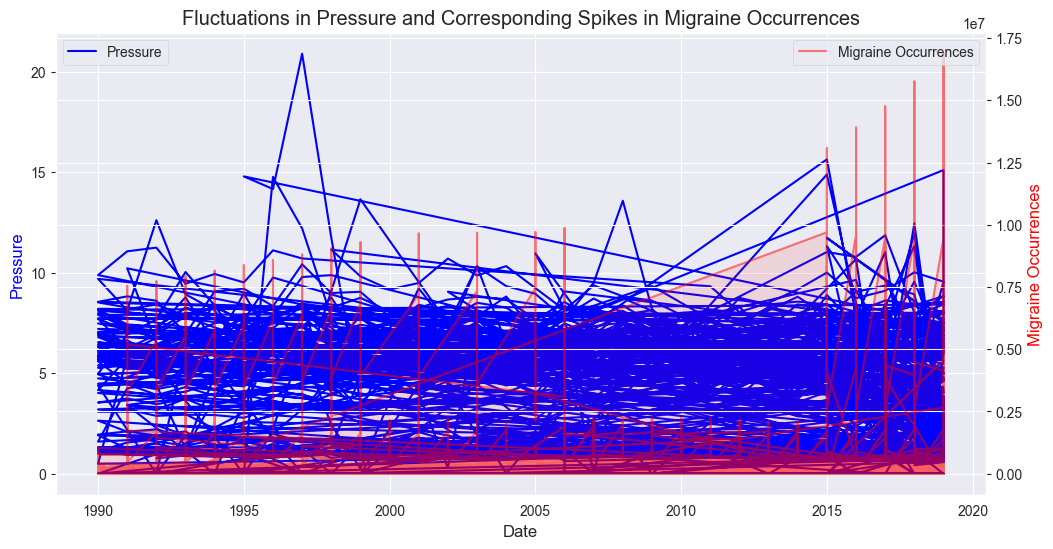

In [36]:
# Plotting the pressure data
plt.figure(figsize=(12,6))
plt.plot(migraine_weather['year'], migraine_weather['std_pressure_changes'], label='Pressure', color='blue')

# Plotting the migraine occurrences on the same graph but with a secondary y-axis
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(migraine_weather['year'], migraine_weather['total_cases'], label='Migraine Occurrences', color='red', alpha=0.5)

# To fill under the line for an area chart, you can use the `fill_between` method
ax2.fill_between(migraine_weather['year'], migraine_weather['total_cases'], alpha=0.1, color='red')

# Adding labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Pressure', color='blue')
ax2.set_ylabel('Migraine Occurrences', color='red')
plt.title('Fluctuations in Pressure and Corresponding Spikes in Migraine Occurrences')

# Adding a legend
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

## 3.6 Advanced Analysis

- Conduct a geographic analysis to explore the relationship between migraines and geographic factors.
- Implement a regression analysis to predict migraine occurrences based on weather variables.
- Conduct a spatial analysis to explore the relationship between migraines and geographic factors.
- Implement a time series analysis to predict migraine occurrences based on weather variables.
- Analyze how demographic factors may interact with sea-level pressure to affect migraine occurrences.

### 3.6.1 Geographic Analysis

In [ ]:
# Load the world map
world = gpd.read_file('../data/naturalearth/ne_110m_admin_0_countries.shp').to_crs(epsg=3395)  # replace with your file path

# Aggregate the total cases by the 'country' column
migraine_cases_by_country = migraine_weather.groupby('country', observed=True)['total_cases'].sum().reset_index()

# Merge the total cases data with the world map data
world_with_cases = world.merge(migraine_cases_by_country, how="left", left_on="NAME", right_on="country")
world_with_cases['total_cases'] = world_with_cases['total_cases'].fillna(0)
world_with_cases['cases_formatted'] = world_with_cases['total_cases'].apply(format_cases)

# Project the geometries to a suitable CRS for centroid calculations
world_with_cases = world_with_cases.to_crs('ESRI:54009')
world['centroid'] = world.centroid
# Fix invalid geometries with a buffer of zero
world['geometry'] = world['geometry'].buffer(0)
world_continents = world.dissolve(by='CONTINENT')
world_continents['continent_centroid'] = world_continents.centroid

# Assuming you set vmin and vmax for the map
vmin = 0
vmax = world_with_cases['total_cases'].quantile(0.95)

# Create the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_with_cases.plot(column='total_cases', ax=ax, cmap='viridis', vmin=vmin, vmax=vmax, 
                      missing_kwds={'color': 'lightgrey'})

# Add continent and cases labels with improved visibility
for continent, row in world_continents.iterrows():
    continent_centroid = (row['continent_centroid'].x, row['continent_centroid'].y)
    add_text_outline(ax, continent, continent_centroid, 8, 'white', 1.5, 'black')

for idx, row in world_with_cases.iterrows():
    if row['total_cases'] > 0 and not row['geometry'].is_empty:
        centroid = row['geometry'].centroid
        add_text_outline(ax, row['cases_formatted'], (centroid.x, centroid.y), 6, 'white', 1, 'black')

ax.set_axis_off()
create_readable_legend(fig, ax, world_with_cases['total_cases'], 'viridis', "Total Cases of Migraine by Country", vmin, vmax)
plt.title("Choropleth Map of Migraine Cases by Country")

# Set the aspect ratio of the plot to 'auto' to avoid "skinny" map appearance
plt.gca().set_aspect('auto')

# Display the plot
plt.show()

In [ ]:
# Get population for each country, removing duplicates within population data
migraine_weather_pop = migraine_weather.drop_duplicates(subset=['country', 'population'])



In [ ]:
migraine_weather_pop


In [ ]:
# View all rows in migraine_weather_pop with the continent column equal to 'Ocieania'
migraine_weather_pop[migraine_weather_pop['continent'] == 'Oceania']

In [ ]:
# Confirm that there are no duplicates
migraine_weather_pop.duplicated(subset=['country', 'population']).sum()

In [ ]:
# Aggregate the country populations by the 'continent' column
continent_populations = migraine_weather_pop.groupby('continent', observed=True)['population'].sum().reset_index()

# Review the DataFrame
continent_populations


In [ ]:
# Get area for each country, removing duplicates within area data
migraine_weather_area = migraine_weather.drop_duplicates(subset=['country', 'area'])

# Confirm that there are no duplicates
migraine_weather_area.duplicated(subset=['country', 'area']).sum()

# Aggregate the country areas by the 'continent' column
continent_areas = migraine_weather_area.groupby('continent', observed=True)['area'].sum().reset_index()

# Review the DataFrame
continent_areas

In [ ]:
# View all rows in migraine_weather_pop with the continent column equal to 'Ocieania'
migraine_weather_area[migraine_weather_area['continent'] == 'Oceania']

In [ ]:
migraine_weather['continent'].value_counts()

### 3.6.2 Regression Analysis

The updated regression model with a refined set of predictors shows a slight improvement in explanatory power with an R-squared value of 0.123. Significant relationships were found between average wind speed, the sum of absolute pressure changes, and precipitation with the total cases of migraines. The model indicates that higher wind speeds and greater absolute pressure changes are associated with fewer migraine cases, while increased precipitation is associated with more cases. Snow depth did not emerge as a significant predictor in this iteration of the model.

The significant constant term suggests a notable baseline level of migraine cases. Non-normal distribution of residuals and potential autocorrelation remain as concerns that should be addressed in further modeling efforts. The reduced condition number reflects a lower risk of multicollinearity, improving the reliability of the findings over previous models, though caution is still advised in interpreting the results due to the remaining numerical concerns.

In [ ]:
# Selecting relevant columns for the regression model
# predictor_vars_1stRun = ['avg_temp_f', 'min_temp_f', 'max_temp_f', 'avg_wind_speed_mph', 'avg_sea_level_pres_mmhg', 
#                      'avg_wind_dir_deg','precipitation_in', 'snow_depth_in']
# predictor_vars_2ndRun = ['avg_temp_f', 'avg_wind_speed_mph', 'avg_sea_level_pres_mmhg', 
#                     'precipitation_in', 'snow_depth_in']
predictor_vars = ['avg_wind_speed_mph', 'sum_abs_pressure_changes', 'precipitation_in', 'snow_depth_in']

response_var = migraine_weather['total_cases']

# Prepare the predictors, adding a constant term for an intercept
X = migraine_weather[predictor_vars]
X = sm.add_constant(X)

# Fit the ,egression model
model = sm.OLS(response_var, X).fit()

# Display the summary of the regression model
print(model.summary())

### 3.6.3 Spatial Analysis

The spatial autocorrelation analysis of migraine cases with a revised k-nearest neighbors parameter (k=14) has resulted in a Moran's I value of 0.7668, which continues to suggest a strong positive spatial autocorrelation. This indicates that similar values of total cases are clustered in space — high values are near high values, and low values are near low values.

Despite increasing the number of neighbors, there remain 182 disconnected components within the spatial weights matrix, indicating that further adjustments are needed to achieve a fully connected spatial relationship among all observations. It is crucial to continue investigating the underlying geographical distribution and consider whether increasing k further or using a different method (like a distance band) could resolve the disconnected components.

The significant Moran's I value reaffirms the non-random geographical pattern of migraine cases, implying that there are likely spatially dependent factors influencing the distribution of cases. Understanding these patterns can be critical for public health planning and identifying areas that may require more focused medical resources or environmental interventions.

In [ ]:
# Assuming you have migraine_data loaded as a pandas DataFrame
gdf = gpd.GeoDataFrame(
    migraine_weather,
    geometry=gpd.points_from_xy(migraine_weather['longitude'], migraine_weather['latitude'])
)

# Create spatial weights with K-nearest neighbors
knn_weights = KNN.from_dataframe(gdf, k=14)
knn_weights.transform = 'r'

# Compute Moran's I for total_cases
moran_i = Moran(gdf['total_cases'], knn_weights)
print(f"Moran's I: {moran_i.I}, p-value: {moran_i.p_sim}")

### 3.6.4 Time-Series Analysis

In [ ]:
# Sum the 'total_cases' for each year regardless of the cause
migraine_cases_by_year_total = migraine_weather.groupby('year')['total_cases'].sum()

# Create the time-series line graph for total cases with human-readable y-axis
plt.figure(figsize=(14, 7))

# Plotting total cases by year
plt.plot(migraine_cases_by_year_total.index, migraine_cases_by_year_total, label='Total Migraines', marker='o')

# Calculate and plot the trend line
z = np.polyfit(migraine_cases_by_year_total.index, migraine_cases_by_year_total, 1)
p = np.poly1d(z)
plt.plot(migraine_cases_by_year_total.index, p(migraine_cases_by_year_total.index), "r--", label='Trend Line')

# Adding title and labels
plt.title('Trend of Total Migraine Cases by Year')
plt.ylabel('Total Cases')

# Formatting the y-axis with 'K', 'M', 'B'
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(human_readable_format))

# Adding min and max labels
add_min_max_labels(plt.gca(), migraine_cases_by_year_total.index, migraine_cases_by_year_total.values)

plt.legend()

# Show grid
plt.grid(False)

# Display the plot
plt.show()

### 3.6.5 Demographic Analysis

In [ ]:
# Define a mapping from the existing age ranges to the new age groups
age_mapping = {
    '85+ years': '85+ years',
    '45-49 years': '30-50 years',
    '50-54 years': '50-60 years',
    '55-59 years': '50-60 years',
    '15-19 years': '<30 years',
    '65-74 years': '60-75 years',
    '75-84 years': '75-85 years',
    '60-64 years': '60-75 years',
    '5-14 years': '<30 years',
    '20-24 years': '<30 years',
    '25-29 years': '<30 years',
    '30-34 years': '30-50 years',
    '35-39 years': '30-50 years',
    '40-44 years': '30-50 years'
}

# Apply the mapping to the 'age' column to create the new 'age_group' column
migraine_weather['age_group'] = migraine_weather['age'].map(age_mapping)

# Verify the mapping by checking unique values in the new 'age_group' column
migraine_weather['age_group'].unique()

In [ ]:
# Group by the new age groups and sex, then sum the total cases
grouped_data_age_sex = migraine_weather.groupby(['age_group', 'sex', 'continent'], observed=True)['total_cases'].sum().reset_index()

# Use the same grouped_data_age_sex dataframe
plot_data = grouped_data_age_sex.copy()

# Create a new column for bubble sizes, scaled to ensure visibility in the plot
plot_data['size'] = plot_data['total_cases'] / plot_data['total_cases'].max() * 100

# Create the bubble chart with Plotly Express
fig = px.scatter(
    plot_data,
    x='continent',
    y='age_group',
    size='size',  # Size of bubbles
    color='sex',  # Color by sex
    hover_name='age_group',  # Show age group on hover
    hover_data={'total_cases': True, 'continent': True, 'size': False, 'age_group': False},  # Show total_cases on hover, not size
    title='Interactive Bubble Chart of Migraine Cases by Age Group and Sex'
)

# Adjust layout for better label visibility
fig.update_layout(xaxis={'categoryorder':'total descending'})

# Show the interactive figure
fig.show()

# This interactive chart can be run in an IPython environment or saved to an HTML file for viewing in a browser.

## 3.7 Insights and Conclusion

- Summarize the key findings from your EDA and statistical tests.
- Discuss the implications of your findings in the context of the initial question.
- Suggest areas for further research or additional data that could provide more insights.

## 3.8 Appendix/References

Include any additional material or references used in your analysis.